In [ ]:
import csv
import timeit
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

def read_items_from_csv(Travel_Items):
    items = []
    with open('Travel_Items.csv', 'r') as f:
        reader = csv.reader(f)
        next(reader)  # skip the header row
        for row in reader:
            items.append({
                'Items': row[0],
                'Profits': int(row[1]),
                'Weights': int(row[2])
            })
    return items

items = read_items_from_csv('items.csv')
print(tabulate(items))

-------------------------------  --  ----
4 Tops                           19   552
3 Bottoms                        20   750
Semi Formal Outfit                3  1500
7 Undergarments                  18   525
7 Socks                          17   126
2 Sets of Pyjamas                 7   600
Foldable Jacket                   8  1100
3 Pair of Shoes                  16  2250
2 Bagpack                         6  1600
Sunglasses                        5    50
Jewelry                           4    50
Voltage Adapter                  15    75
Dental Supplies                  13   200
Shower Supplies                  14   500
Deodorant                        12    75
Haircomb                          9    75
Skincare Supplies                10   500
Shaving Supllies                 11   500
Travel-sized Laundry Detergents   1    40
Travel-friendly Food              2   300
-------------------------------  --  ----


In [ ]:
# solving using greedy method
def solve_knapsack_greedy(items, max_weight):
    sorted_items = sorted(items, key=lambda x: x['Profits'] / x['Weights'], reverse=True) # sort by desc order
    # declare and initialize total profit & weight
    total_profit = 0
    total_weight = 0
    selected_items = []
    for item in sorted_items:
        if total_weight + item['Weights'] <= max_weight: # if item can be added into the bag, add it
            selected_items.append(item) # create list of selected item that can be added into the bag
            total_profit += item['Profits'] # add all of the selected item profit
            total_weight += item['Weights'] # add all of the selected weight profit
        else: # if item can't be added into the bag, try to fit it
            fraction = (max_weight - total_weight) / item['Weights']
            total_profit += fraction * item['Profits']
            break

    return (total_profit, selected_items)

max_weight = 3000 # in gram

total_profit, selected_items = solve_knapsack_greedy(items, max_weight)
print(f'Total Profits: {total_profit}')
print(f'Selected Items: {tabulate(selected_items)}') # display list of item in table

Total Profits: 146.55
Selected Items: ---------------  --  ---
Voltage Adapter  15   75
Deodorant        12   75
7 Socks          17  126
Haircomb          9   75
Sunglasses        5   50
Jewelry           4   50
Dental Supplies  13  200
4 Tops           19  552
7 Undergarments  18  525
Shower Supplies  14  500
3 Bottoms        20  750
---------------  --  ---


In [ ]:
#solving using dynamic method
def solve_knapsack_dynamic(items, max_weight):
    n = len(items)
    profit = [[0] * (max_weight + 1) for _ in range(n + 1)] # create 2D array to store sub problem
    for i in range(1, n + 1): # loop through items
        for j in range(1, max_weight + 1): # loop through capacity
            # if the current item is more than the current capacity, we cannot include it in the knapsack
            if items[i - 1]['Weights'] > j:
                profit[i][j] = profit[i - 1][j]
            else:
              # calculate the maximum value by either including the current item or not including it
                profit[i][j] = max(profit[i - 1][j], profit[i - 1][j - items[i - 1]['Weights']] + items[i - 1]['Profits'])
    selected_items = [] # to store the selected items
    j = max_weight # to store the remaining weight
    # checks if the value of the knapsack with that item included is different from the value of the knapsack without the item
    # if the value is different, it means that the item was included in the optimal solution
    for i in range(n, 0, -1):
        if profit[i][j] != profit[i - 1][j]:
            selected_items.append(items[i - 1])
            j -= items[i - 1]['Weights']
    selected_items.reverse()
    return (profit[n][max_weight], selected_items)

max_weight = 3000 # in gram

total_profit, selected_items = solve_knapsack_dynamic(items, max_weight)
print(f'Total Profits: {total_profit}')
print(f'Selected Items: {tabulate(selected_items)}') # display list of item in table

Total Profits: 146
Selected Items: ---------------  --  ---
4 Tops           19  552
3 Bottoms        20  750
7 Undergarments  18  525
7 Socks          17  126
Sunglasses        5   50
Jewelry           4   50
Voltage Adapter  15   75
Dental Supplies  13  200
Shower Supplies  14  500
Deodorant        12   75
Haircomb          9   75
---------------  --  ---


Execution time of the greedy algorithm: 0.000605 seconds
Execution time of the dynamic programming algorithm: 0.014835 seconds


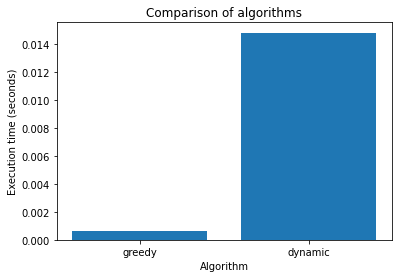

In [ ]:
random.seed(0)
items = []
for i in range(1000):
    items.append({
        'Items': f'item{i}',
        'Profits': random.randint(1, 100),
        'Weights': random.randint(1, 100)
        
    })

max_weight = 30

# measure the execution time of the greedy algorithm
t = timeit.timeit(lambda: solve_knapsack_greedy(items, max_weight), number=1)
print(f'Execution time of the greedy algorithm: {t:.6f} seconds')

# measure the execution time of the dynamic programming algorithm
t1 = timeit.timeit(lambda: solve_knapsack_dynamic(items, max_weight), number=1)
print(f'Execution time of the dynamic programming algorithm: {t1:.6f} seconds')

# data to be plotted
algorithms = ['greedy', 'dynamic']
times = [t, t1]  # execution times of the two algorithms

# create the bar plot
plt.bar(algorithms, times)

# add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Execution time (seconds)')
plt.title('Comparison of algorithms')

# show the plot
plt.show()